Artificial Two 3-dimensional Unimodal Gaussian Classes.
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  7.6442755710000085
Average MCC:  0.12483183794388455
Average error: 45.1363
Average macro-F1: 0.4943022793534908
Average micro-F1: 0.5454000000000001
Average Accuracy:  54.8637
Standard Deviation:  23.668891087459084
Variance:  560.21640531


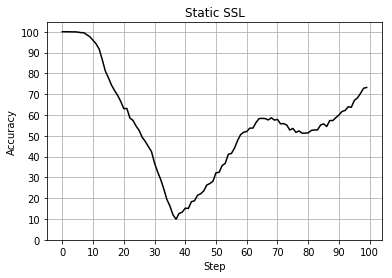

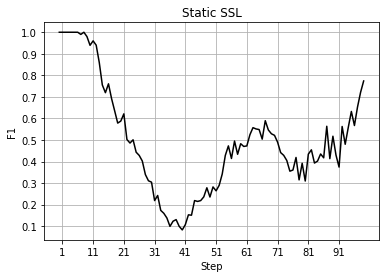

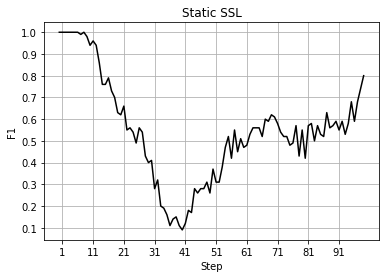




METHOD: Sliding lp as classifier
Execution time:  3.364039290000008
Average MCC:  0.2700411722991025
Average error: 36.7738
Average macro-F1: 0.517693912720002
Average micro-F1: 0.6303000000000001
Average Accuracy:  63.2262
Standard Deviation:  20.35093215457218
Variance:  414.16043955999993


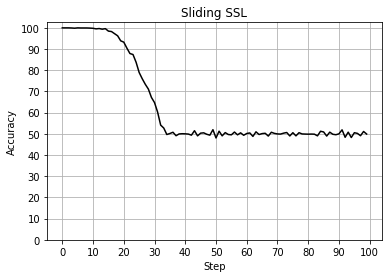

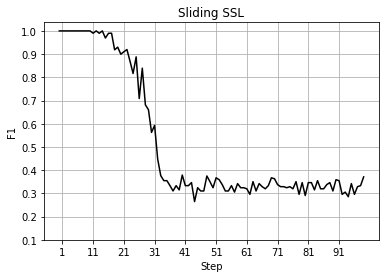

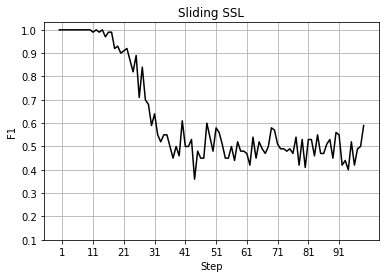




METHOD: Incremental lp as classifier
Execution time:  104.590459012
Average MCC:  0.11405250813450209
Average error: 43.578199999999995
Average macro-F1: 0.4841418370484661
Average micro-F1: 0.5652000000000001
Average Accuracy:  56.421800000000005
Standard Deviation:  25.21882873489568
Variance:  635.98932276


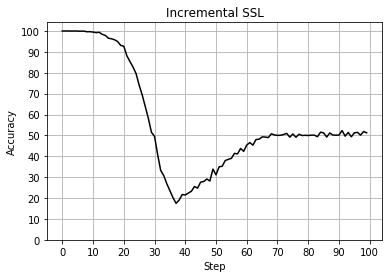

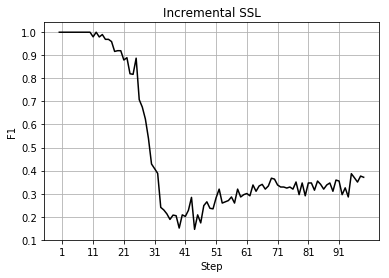

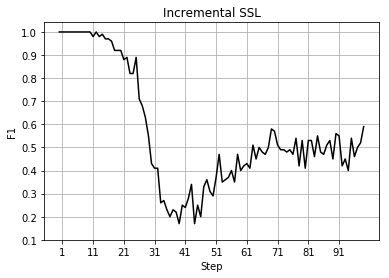




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  28.09145936499999
Average MCC:  0.8517024543849803
Average error: 7.728100000000026
Average macro-F1: 0.9239508537141091
Average micro-F1: 0.9251999999999999
Average Accuracy:  92.27189999999997
Standard Deviation:  9.593792857363557
Variance:  92.04086139


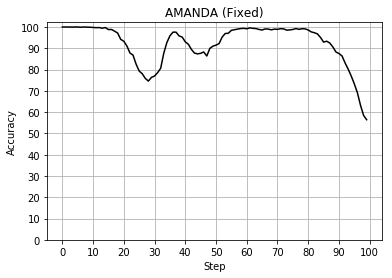

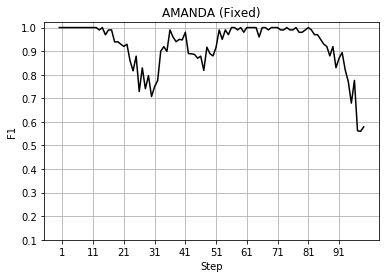

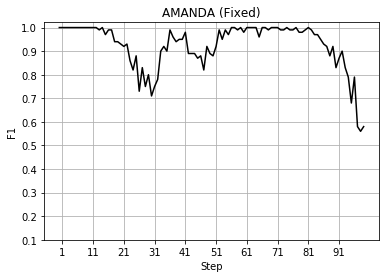




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.30 | Std keeping percentage=0.20
Execution time:  30.521913708
Average MCC:  0.8231593163500299
Average error: 9.159099999999995
Average macro-F1: 0.9098640060408303
Average micro-F1: 0.9110999999999998
Average Accuracy:  90.8409
Standard Deviation:  9.21200988872678
Variance:  84.86112618999996


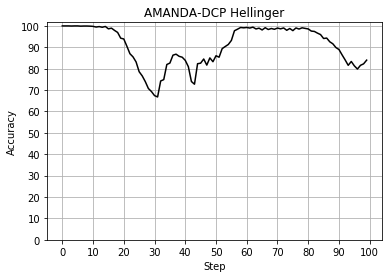

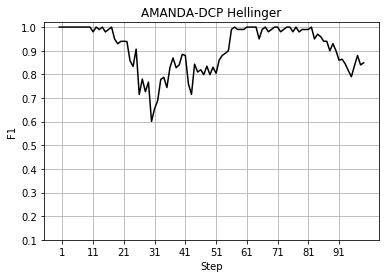

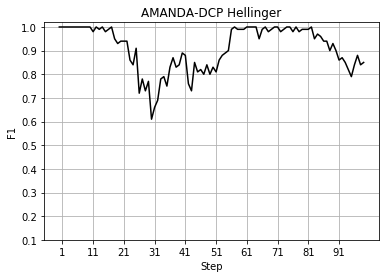




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.18 | Std keeping percentage=0.03
Execution time:  30.075585305000004
Average MCC:  0.8591124286796482
Average error: 7.489999999999995
Average macro-F1: 0.9284785362795551
Average micro-F1: 0.9294
Average Accuracy:  92.51
Standard Deviation:  8.505135389868878
Variance:  72.33732800000003


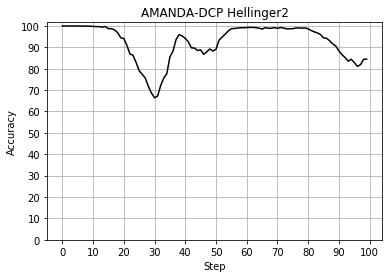

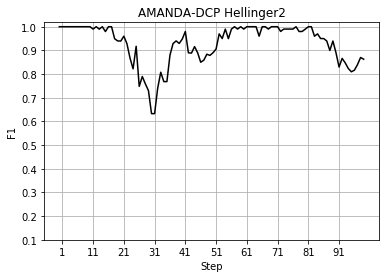

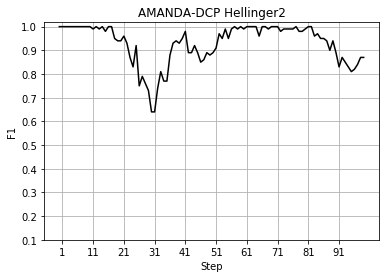




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -1.000 | Mean keeping percentage=0.16 | Std keeping percentage=0.03
Execution time:  30.760454363999997
Average MCC:  0.881787489698569
Average error: 6.2076999999999884
Average macro-F1: 0.9396656350623277
Average micro-F1: 0.9404
Average Accuracy:  93.79230000000001
Standard Deviation:  6.873751647390237
Variance:  47.248461709999994


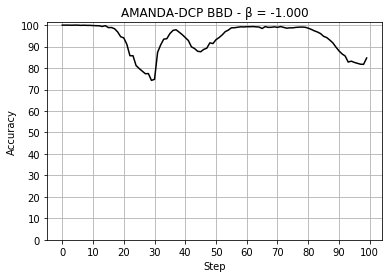

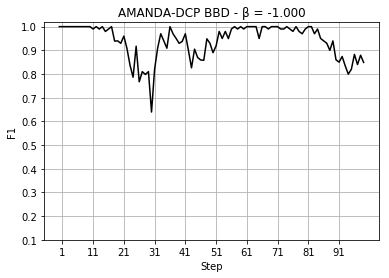

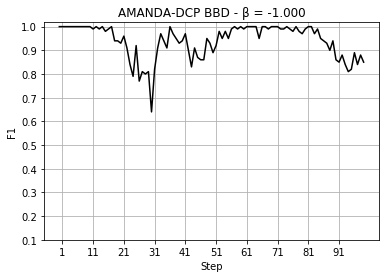




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.12 | Std keeping percentage=0.01
Execution time:  30.506719744999998
Average MCC:  0.8819408275281405
Average error: 6.322500000000019
Average macro-F1: 0.9400531206112273
Average micro-F1: 0.9408000000000001
Average Accuracy:  93.67749999999998
Standard Deviation:  7.092781312715061
Variance:  50.30754674999999


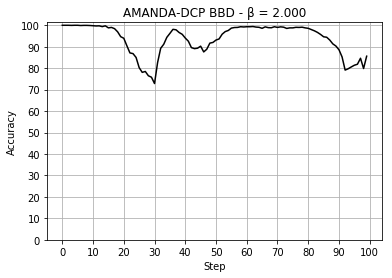

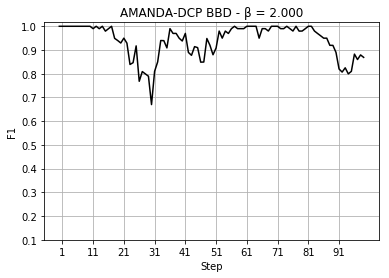

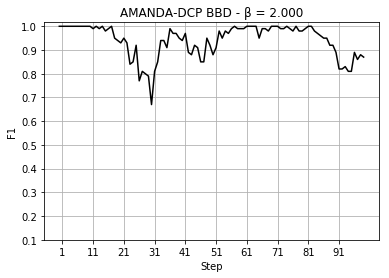




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 3.000 | Mean keeping percentage=0.12 | Std keeping percentage=0.01
Execution time:  27.292273423999973
Average MCC:  0.8945819040548479
Average error: 5.54379999999999
Average macro-F1: 0.946448720006384
Average micro-F1: 0.9470999999999999
Average Accuracy:  94.45620000000001
Standard Deviation:  5.763166105536088
Variance:  33.214083560000006


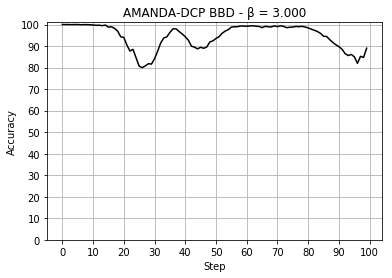

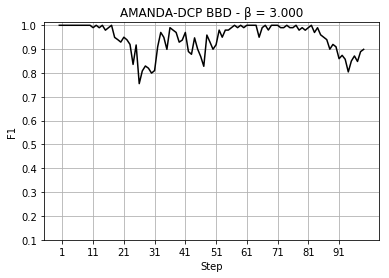

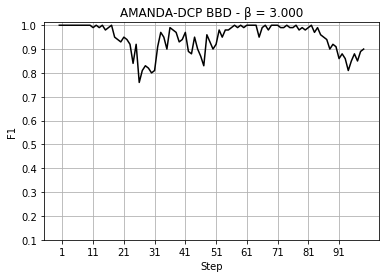




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.13 | Std keeping percentage=0.02
Execution time:  28.607976510000015
Average MCC:  0.8365478819878078
Average error: 8.387899999999988
Average macro-F1: 0.9170997058547146
Average micro-F1: 0.9181
Average Accuracy:  91.61210000000001
Standard Deviation:  8.690086799911725
Variance:  75.51760859000001


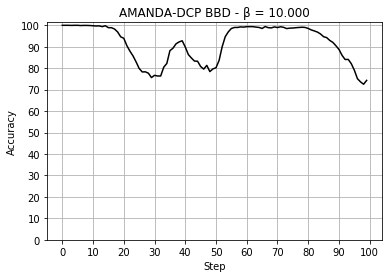

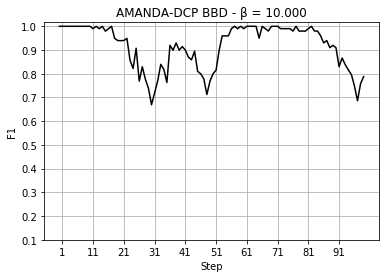

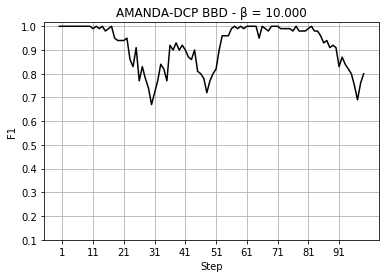

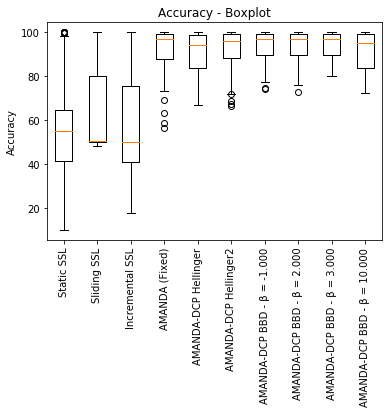

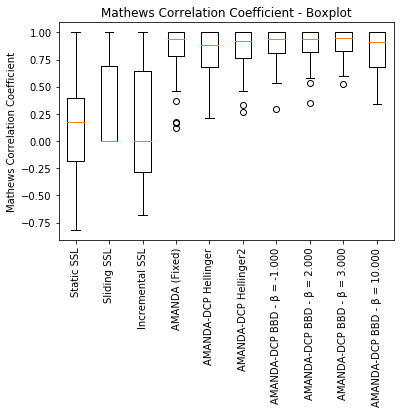

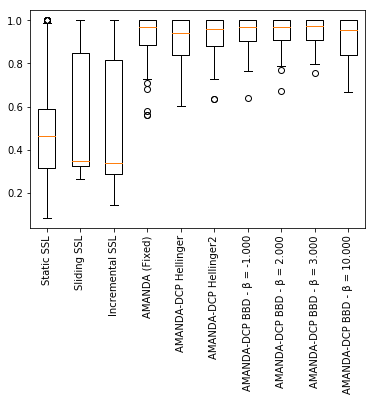

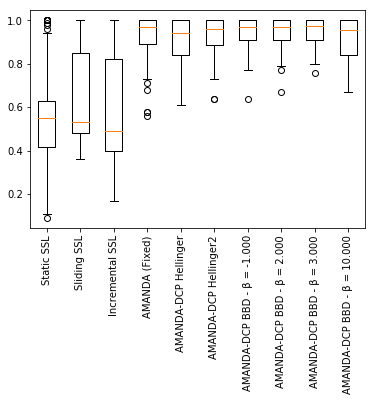

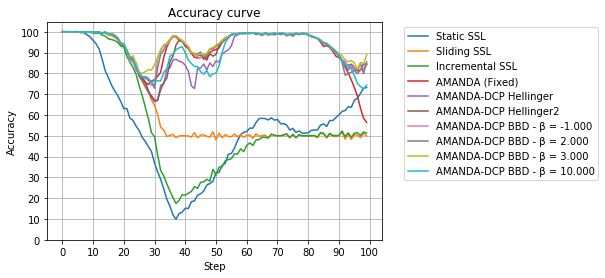

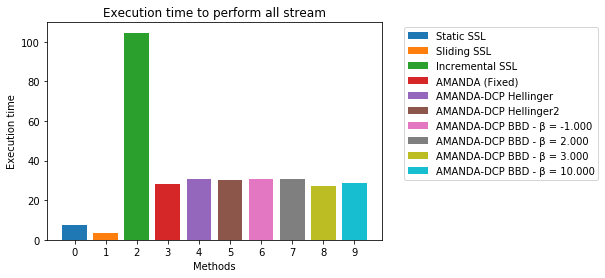

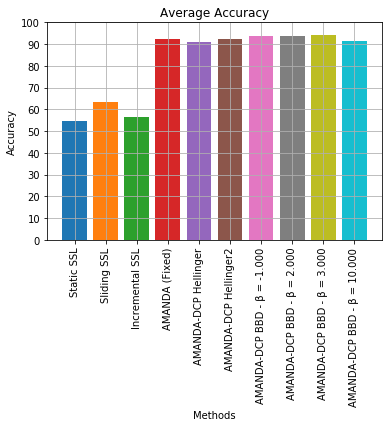

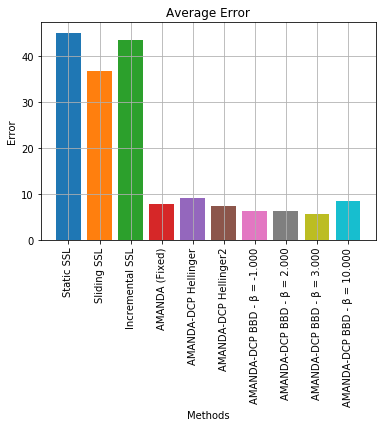

Pos 8 - Error reduction (Sliding SSL):15.242318691593889
Pos 9 - Error reduction (Incremental SSL):2.839946995918983
Pos 5 - Error reduction (AMANDA (Fixed)):68.18388114545678
Pos 7 - Error reduction (AMANDA-DCP Hellinger):65.57559916666212
Pos 4 - Error reduction (AMANDA-DCP Hellinger2):68.61786572907042
Pos 2 - Error reduction (AMANDA-DCP BBD - β = -1.000):70.95511239672135
Pos 3 - Error reduction (AMANDA-DCP BBD - β = 2.000):70.7458665748026
Pos 1 - Error reduction (AMANDA-DCP BBD - β = 3.000):72.16520212818313
Pos 6 - Error reduction (AMANDA-DCP BBD - β = 10.000):66.98126447906358


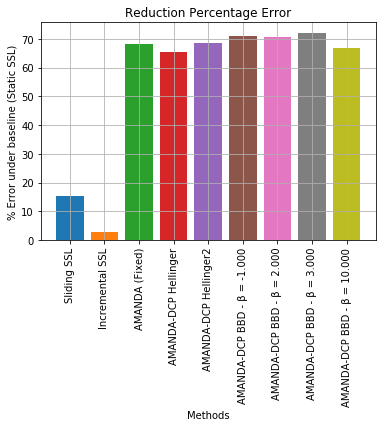

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[4])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadUG_2C_3D(path, sep)
    
    # 5% of initial labeled data
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 4, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 4, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 4, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 4, 0.65, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP Original)
    experiments[4] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 2, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    lastIndex = list(experiments.keys())[-1]
    betas = [-1, 2, 3, 10]
    bestK = [4, 4, 9, 2]
    for i in range(len(betas)):
        experiments[lastIndex+1+i] = Experiment(amanda_dynamic, bestK[i], None, "kde", sslClassifier, 'BBD', beta=betas[i])
    
    # Proposed method 5 (AMANDA - DCP HDDDM)
    #experiments[17] = Experiment(amanda_dynamic, 3, None, "kde", sslClassifier, 'HDDDM')
    
    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 9)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'UG_2C_3D', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()